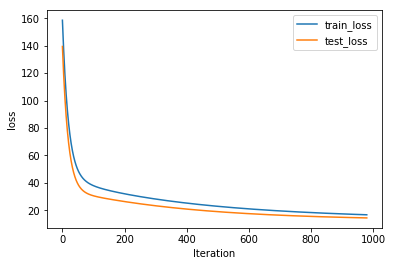

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X, y = load_svmlight_file("housing_scale.txt")

#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_train = X_train.todense()
X_test = X_test.todense()

y_train =  y_train.reshape(y_train.shape[0],1)
y_test =  y_test.reshape(y_test.shape[0],1)

m, n = np.shape(X_train)
theta = np.ones((n, 1))
alpha = 0.00001
maxIteration = 1000

#Choose loss function and calculate loss
def cal_loss(a,b,theta):
    return (1/2 *(np.linalg.norm(a*theta-b))**2)/ (a.shape[0])
    
train_loss = []
test_loss = []

for i in range(0, maxIteration):
    gradient =2* X_train.T * (X_train * theta - y_train)

    theta = theta - alpha * gradient

    train_loss.append(cal_loss(X_train,y_train,theta))
    test_loss.append(cal_loss(X_test,y_test,theta))

#绘图
%matplotlib inline
plt.xlabel("Iteration")
plt.ylabel("loss")

plt.plot(train_loss[20:], label="train_loss")
plt.plot(test_loss[20:],label="test_loss" )
plt.legend(loc='upper right')